In [2]:
import torch

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={"figure.figsize": (15, 6)})
sns.set_palette(sns.color_palette("Set2", 10))

from skimage import transform
from torch.utils.data import DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [3]:
torch.__version__

'1.0.1.post2'

In [4]:
from dataset import *
from show import *

# Loading Dataset

In [5]:
dset = BuildingsDataset("data/labels")

In [6]:
idx = 0
sample = dset[idx]
img, lbl = sample['image'], sample['label']
label_names = dset.label_name_to_value

print(img.shape, img.dtype)
print(lbl.shape, lbl.dtype)
print(label_names)

(2048, 3072, 3) float32
(2048, 3072, 1) uint8
{'_background_': 0, 'door': 1, 'object': 2, 'wall': 3, 'window': 4}


# Displaying data

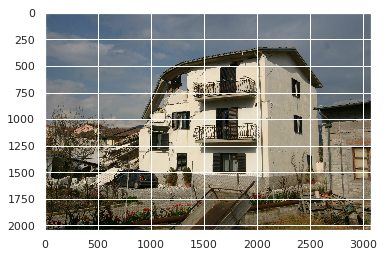

In [7]:
plt.imshow(img)
plt.show()

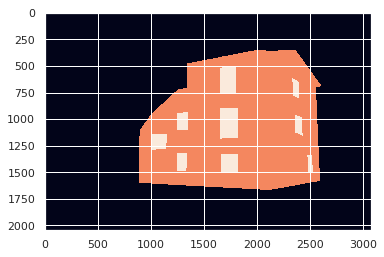

In [8]:
plt.imshow(lbl[:, :, 0])
plt.show()

(2048, 3072, 3) (2048, 3072, 1)


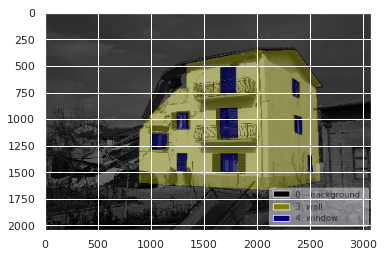

In [9]:
show_labeled_img(img, lbl, label_names)

# Going further

In [10]:
data_transform1 = transforms.Compose([
    #Rescale(1024),
    RandomCrop(512), 
    ToTensor(),
])

data_transform2 = transforms.Compose([
        transforms.ToTensor(),
        transforms.ToPILImage(),
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [14]:
dset_tensor = BuildingsDataset("data/labels", transform=data_transform2)
dataloader = DataLoader(dset_tensor, batch_size=4, shuffle=True, num_workers=4)

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])
(228, 906, 3) (228, 906)


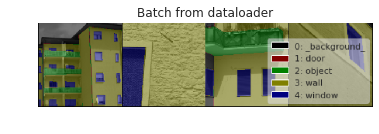

In [15]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(), sample_batched['label'].size())

    # just testing, we don't iterate over the whole thing...
    if i_batch == 0:
        plt.figure()
        show_batch(sample_batched, label_names, 4)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break